# Question-1

In [5]:
import pandas as pd

In [6]:
#extracting the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep='|')

In [7]:
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print(mean_age_per_occupation)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [8]:
def male_ratio(group):
    return (group == 'M').sum() / group.count()

male_ratio_per_occupation = users.groupby('occupation')['gender'].apply(male_ratio).sort_values(ascending=False)

In [9]:
male_ratio_per_occupation

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64

In [10]:
age_stats_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])

In [11]:
age_stats_per_occupation

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [12]:
mean_age_per_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean()
mean_age_per_occupation_sex

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [13]:
gender_percentage_per_occupation = users.groupby('occupation')['gender'].value_counts(normalize=True).mul(100).unstack()
gender_percentage_per_occupation

gender,F,M
occupation,,
administrator,45.569620,54.430380
artist,46.428571,53.571429
doctor,NaN,100.000000
educator,27.368421,72.631579
engineer,2.985075,97.014925
entertainment,11.111111,88.888889
executive,9.375000,90.625000
healthcare,68.750000,31.250000
homemaker,85.714286,14.285714


# Question-2

In [16]:
#extracting the dataset
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url,sep=',')

In [17]:
goals = euro12['Goals']

In [18]:
goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [19]:
num_teams = euro12['Team'].nunique()

In [33]:
num_teams

16

In [34]:
num_columns = euro12.shape[1]
num_columns

35

In [35]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [36]:
discipline_sorted = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=False)
discipline_sorted

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [37]:
mean_yellow_cards = euro12['Yellow Cards'].mean()
mean_yellow_cards

7.4375

In [38]:
teams_more_than_six_goals = euro12[euro12['Goals'] > 6]
teams_more_than_six_goals

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [39]:
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]
teams_starting_with_G

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [40]:
first_seven_columns = euro12.iloc[:, :7]
first_seven_columns

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [41]:
all_except_last_three_columns = euro12.iloc[:, :-3]
all_except_last_three_columns

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [42]:
shooting_accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
shooting_accuracy

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question-3

In [20]:
import numpy as np

In [21]:
series_1 = pd.Series(np.random.randint(1, 5, size=100))
series_2 = pd.Series(np.random.randint(1, 4, size=100))
series_3 = pd.Series(np.random.randint(10000, 30001, size=100))


In [248]:
series_1

0     4
1     1
2     4
3     4
4     1
     ..
95    2
96    1
97    1
98    3
99    3
Length: 100, dtype: int32

In [249]:
series_2

0     2
1     2
2     1
3     3
4     2
     ..
95    2
96    1
97    2
98    3
99    1
Length: 100, dtype: int32

In [250]:
series_3

0     23774
1     22231
2     22355
3     15797
4     16105
      ...  
95    26981
96    18723
97    10036
98    27958
99    15310
Length: 100, dtype: int32

In [251]:
data = pd.concat([series_1, series_2, series_3], axis=1)
data

,0,1,2
0,4,2,23774
1,1,2,22231
2,4,1,22355
3,4,3,15797
4,1,2,16105
...,...,...,...
95,2,2,26981
96,1,1,18723
97,1,2,10036
98,3,3,27958


In [252]:
data.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

In [253]:
data.columns

Index(['bedrs', 'bathrs', 'price_sqr_meter'], dtype='object')

In [254]:
bigcolumn = pd.concat([series_1, series_2, series_3], axis=0)

In [255]:
bigcolumn

0         4
1         1
2         4
3         4
4         1
      ...  
95    26981
96    18723
97    10036
98    27958
99    15310
Length: 300, dtype: int32

In [256]:
print("Is it going only until index 99?", bigcolumn.index.max() == 99)

Is it going only until index 99? True


In [67]:
bigcolumn.reset_index(drop=True, inplace=True)

In [68]:
bigcolumn.reset_index

<bound method Series.reset_index of 0          4
1          3
2          1
3          2
4          1
       ...  
295    10397
296    24809
297    16064
298    20122
299    27030
Length: 300, dtype: int32>

# Question-4

In [22]:
wind= pd.read_csv('C:/Georgian/BDAT-1004/Problem Set/3/wind.txt', delim_whitespace=True)

In [23]:
wind['Date'] = pd.to_datetime('20' + wind['Yr'].astype(str) + wind['Mo'].astype(str) + wind['Dy'].astype(str), format='%Y%m%d')
wind = wind.set_index('Date')
wind= wind.drop(['Yr', 'Mo', 'Dy'], axis=1)

In [24]:
wind

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
2078-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
2078-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
2078-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [25]:
def fix_year(date):
    if date.year > 2000:
        return date - pd.DateOffset(years=100)
    return date

In [26]:
wind.index = wind.index.map(fix_year)

In [27]:
wind.index

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

In [28]:
wind.index = pd.to_datetime(wind.index)
wind.index 

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

In [29]:
missing_values_per_location = wind.isnull().sum()
missing_values_per_location

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [30]:
non_missing_values_total = wind.notnull().sum().sum()
non_missing_values_total

78857

In [31]:
mean_windspeed = wind.stack().mean()
mean_windspeed

10.22788376428218

In [32]:
loc_stats = wind.describe().T[['min', 'max', 'mean', 'std']]
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [33]:
day_stats = wind.resample('D').agg(['min', 'max', 'mean', 'std'])
day_stats

RPT                      VAL                      ROS         \
              min    max   mean std    min    max   mean std    min    max   
Date                                                                         
1961-01-01  15.04  15.04  15.04 NaN  14.96  14.96  14.96 NaN  13.17  13.17   
1961-01-02  14.71  14.71  14.71 NaN    NaN    NaN    NaN NaN  10.83  10.83   
1961-01-03  18.50  18.50  18.50 NaN  16.88  16.88  16.88 NaN  12.33  12.33   
1961-01-04  10.58  10.58  10.58 NaN   6.63   6.63   6.63 NaN  11.75  11.75   
1961-01-05  13.33  13.33  13.33 NaN  13.25  13.25  13.25 NaN  11.42  11.42   
...           ...    ...    ...  ..    ...    ...    ...  ..    ...    ...   
1978-12-27  17.58  17.58  17.58 NaN  16.96  16.96  16.96 NaN  17.62  17.62   
1978-12-28  13.21  13.21  13.21 NaN   5.46   5.46   5.46 NaN  13.46  13.46   
1978-12-29  14.00  14.00  14.00 NaN  10.29  10.29  10.29 NaN  14.42  14.42   
1978-12-30  18.50  18.50  18.50 NaN  14.04  14.04  14.04 NaN  21.29  21.29   
1978-12-31  20.33  20.33  20.33 NaN  17.41  17.41  17.41 NaN  27.29  27.29   

            ...    CLO        BEL                      MAL                    
            ...   mean std    min    max   mean std    min    max   mean std  
Date        ...                                                               
1961-01-01  ...  12.58 NaN  18.50  18.50  18.50 NaN  15.04  15.04  15.04 NaN  
1961-01-02  ...   9.67 NaN  17.54  17.54  17.54 NaN  13.83  13.83  13.83 NaN  
1961-01-03  ...   7.67 NaN  12.75  12.75  12.75 NaN  12.71  12.71  12.71 NaN  
1961-01-04  ...   5.88 NaN   5.46   5.46   5.46 NaN  10.88  10.88  10.88 NaN  
1961-01-05  ...  10.34 NaN  12.92  12.92  12.92 NaN  11.83  11.83  11.83 NaN  
...         ...    ...  ..    ...    ...    ...  ..    ...    ...    ...  ..  
1978-12-27  ...  14.00 NaN  17.21  17.21  17.21 NaN  40.08  40.08  40.08 NaN  
1978-12-28  ...  18.05 NaN  21.79  21.79  21.79 NaN  41.46  41.46  41.46 NaN  
1978-12-29  ...  16.42 NaN  18.88  18.88  18.88 NaN  29.58  29.58  29.58 NaN  
1978-12-30  ...  12.12 NaN  14.67  14.67  14.67 NaN  28.79  28.79  28.79 NaN  
1978-12-31  ...  11.38 NaN  12.08  12.08  12.08 NaN  22.08  22.08  22.08 NaN  

[6574 rows x 48 columns]

In [34]:
january_means = wind[wind.index.month == 1].resample('Y').mean()
january_means

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,13.983846,12.385833,11.666923,6.826923,10.151667,7.179231,11.008462,7.600833,8.442308,8.879231,12.714615,13.451538
1962-12-31,12.935385,10.930000,11.578462,5.493077,9.496923,6.741538,12.332308,8.266154,7.375385,10.284615,14.673846,14.681538
1963-12-31,17.286154,13.736923,19.306154,9.307692,14.330000,10.900769,17.404615,13.731538,11.018462,13.140769,15.915385,26.124615
1964-12-31,14.673846,12.779231,11.615385,9.125385,12.619231,8.076154,9.805385,11.411538,8.330769,10.653846,18.139231,14.977692
1965-12-31,14.977692,14.593846,15.044615,7.004615,11.403077,7.968462,13.363077,10.386923,8.568462,10.861538,15.160769,17.833077
1966-12-31,15.281538,13.096154,15.119231,9.570000,13.166923,10.245385,13.258462,11.492308,10.433846,13.087692,17.078462,18.868462
1967-12-31,10.186923,8.129231,10.073846,4.135385,7.969231,4.419231,9.312308,4.788462,6.215385,7.878462,9.943846,15.484615
1968-12-31,15.301538,13.894615,13.433077,8.432308,12.843846,7.355385,12.500000,8.746923,9.314615,8.894615,12.783077,19.176923
1969-12-31,11.781538,9.768462,12.102308,6.048462,9.929231,5.673077,11.303077,7.877692,8.724615,9.990769,13.622308,19.945385


In [35]:
data_yearly = wind.resample('Y').mean()
data_yearly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [36]:
data_monthly = wind.resample('M').mean()
data_monthly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,13.983846,12.385833,11.666923,6.826923,10.151667,7.179231,11.008462,7.600833,8.442308,8.879231,12.714615,13.451538
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [37]:
data_weekly = wind.resample('W').mean()
data_weekly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.975000,10.975000,14.750000,6.540000,10.040000,6.665000,9.730000,8.960000,8.165000,9.040000,10.810000,13.600000
1961-01-22,9.590000,11.830000,7.960000,1.580000,7.920000,5.000000,3.170000,4.920000,3.130000,3.370000,6.500000,6.790000
1961-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,15.695000,12.454000,13.829000,6.538000,11.677000,9.042000,10.779000,9.089000,10.158000,10.300000,12.910000,19.077000
1978-12-10,20.078462,16.865385,15.906154,9.553077,14.863077,11.086923,14.834615,12.668462,12.900769,13.018462,18.118462,25.006154
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [38]:
weekly_stats_first_52 = wind.resample('W').agg(['min', 'max', 'mean', 'std']).iloc[:52]
weekly_stats_first_52

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-01  15.04  15.04  15.040000       NaN  14.96  14.96  14.960000   
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15  12.58  13.37  12.975000  0.558614  10.83  11.12  10.975000   
1961-01-22   9.59   9.59   9.590000       NaN  11.83  11.83  11.830000   
1961-01-29    NaN    NaN        NaN       NaN    NaN    NaN        NaN   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   
1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54  13.501429   
1961-03-26   6.29  15.00   9.567143  3.613298   2.58  11.63   8.387143   
1961-04-02   5.88  18.25  10.757143  5.046922   3.50  16.29   8.852857   
1961-04-09   4.50  18.12  11.964286  4.604392   7.04  14.62  10.654286   
1961-04-16   4.71  15.50   8.965714  3.937727   4.83  12.25   8.000000   
1961-04-23   4.00  21.09  12.621429  5.676655   3.71  15.41  10.438571   
1961-04-30   4.08  16.29  10.117143  4.349662   6.50  14.46   9.798571   
1961-05-07   9.87  23.00  15.367143  5.025507  10.29  19.79  13.970000   
1961-05-14   3.54  12.79   7.772857  3.371022   3.96  15.12   8.712857   
1961-05-21   4.88  15.04   8.225714  3.631730   3.58  10.17   5.631667   
1961-05-28   4.96  11.79   8.155714  2.739433   3.67  12.50   7.388571   
1961-06-04   7.00  15.92  10.321429  3.099701   4.75   9.79   7.407143   
1961-06-11   8.29  14.42  10.917143  2.248597   6.83  11.54   8.992857   
1961-06-18   6.13  14.33  10.571429  3.009482   4.12  14.54   9.565714   
1961-06-25   4.00   9.00   7.345714  1.982035   3.25   9.50   6.108571   
1961-07-02   7.21  13.13  10.236667  2.557856   6.34  14.37   9.482857   
1961-07-09   7.29  17.50  11.715714  3.664855   3.75  10.75   7.220000   
1961-07-16   8.63  22.50  16.680000  5.168710   7.87  19.29  13.518571   
1961-07-23   3.04   5.88   4.202857  1.047978   2.92   6.79   4.255714   
1961-07-30   6.13  16.08  10.561429  4.157641   4.63  13.79   8.445714   
1961-08-06   7.67  16.08  10.870000  2.950887   5.09  15.79   8.792857   
1961-08-13   2.88  14.21  10.058333  4.422268   4.42  10.00   7.941429   
1961-08-20  13.13  18.91  15.607143  2.283635   7.25  13.62  10.565714   
1961-08-27   7.67  18.16  12.391429  3.395857   6.87  14.58  11.430000   
1961-09-03   3.63  14.46   8.678571  4.398615   1.13  22.00   8.821429   
1961-09-10   5.00  17.62  10.541429  5.207278   3.04  13.59   8.798571   
1961-09-17   5.33  28.75  17.160000  7.679190   7.12  22.08  14.440000   
1961-09-24   6.92  10.25   8.500000  1.267399   2.92  13.62   7.154286   
1961-10-01  10.34  23.21  16.044286  4.559572   6.96  13.62  11.361667   
1961-10-08   3.13  16.08  11.250000  5.596710   3.63  16.96   8.757143   
1961-10-15   3.71  17.12  10.881667  4.780675   6.13  13.25   9.734286   
1961-10-22  10.46  28.62  19.260000  7.888314   3.75  19.46  13.364286   
1961-10-29   4.33  26.42  16.077143  7.957637   2.75  21.25  11.867143   
1961-11-05   5.88  19.75  11.860833  3.622291   3.54  13.46   8.995833   
1961-11-12   4.92  19.83  11.992727  5.238817   3.42  14.37   8.628182   
1961-11-19   7.50  15.00  10.798571  2.784358   4.21  13.00   7.951429   
1961-11-26   5.75  14.29   9.154286  3.214368   3.29  11.79   7.337143   
1961-12-03   7.92  23.75  12.872000  4.967637   4.67  18.71   9.919000   
1961-12-10  10.83  25.04  18.690000  4.920859   9.21  23.91  15.659231   
1961-12-17   9.29  21.34  14.985714  4.095106   8.63  17.62  13.472857   
1961-12-24  11.46 

# Question-5

In [39]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')

In [40]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [41]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [42]:
num_observations = chipo.shape[0]
num_observations

4622

In [43]:
num_columns = chipo.shape[1]
num_columns

5

In [44]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [45]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [46]:
most_ordered = chipo.groupby('item_name').quantity.sum().idxmax()
most_ordered

'Chicken Bowl'

In [47]:
qty_most_ordered = chipo.groupby('item_name').quantity.sum().max()
qty_most_ordered

761

In [48]:
total_items_ordered = chipo.quantity.sum()
total_items_ordered

4972

In [49]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:-1]))
chipo['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [50]:
chipo['revenue'] = chipo['item_price'] * chipo['quantity']
total_revenue = chipo['revenue'].sum()
total_revenue

39237.02

In [51]:
num_orders = chipo['order_id'].nunique()
num_orders

1834

In [52]:
average_revenue_per_order = total_revenue / num_orders
average_revenue_per_order

21.39423118865867

In [53]:
num_different_items = chipo['item_name'].nunique()
num_different_items

50

# Question-6

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
# load the dataset into dataframe
file_path = 'C:\\Georgian\\BDAT-1004\\Problem Set\\3\\us-marriages-divorces-1867-2014.csv'
marriages_divorces= pd.read_csv(file_path)

In [56]:
marriages_divorces

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


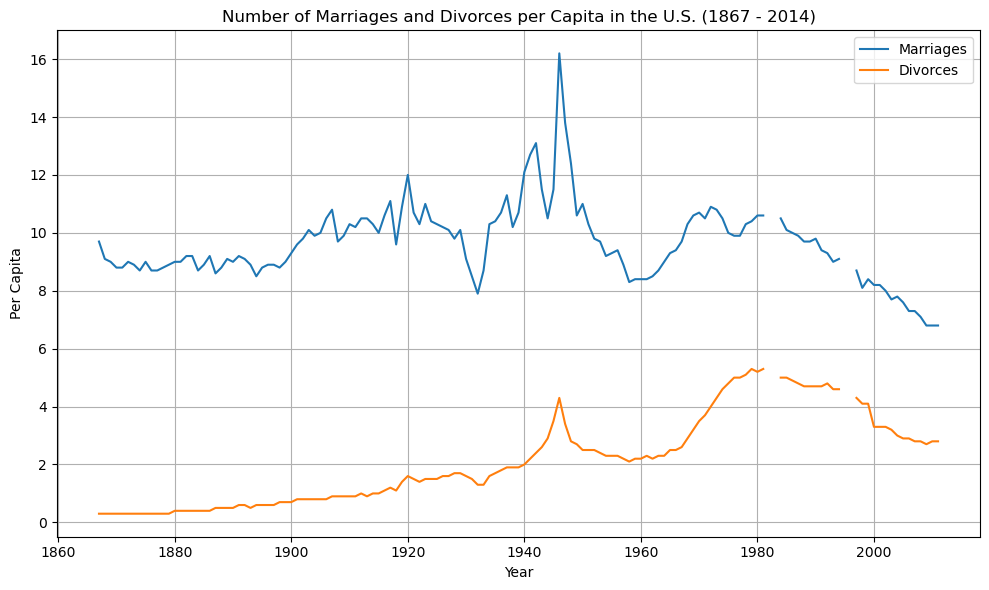

In [57]:
#create a line graph
plt.figure(figsize=(10, 6))

# Plotting marriages and divorces per capita
plt.plot(marriages_divorces['Year'], marriages_divorces['Marriages_per_1000'], label='Marriages')
plt.plot(marriages_divorces['Year'], marriages_divorces['Divorces_per_1000'], label='Divorces')

# Labeling axes and title
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867 - 2014)')

# Adding legend
plt.legend()

# Display plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Question-7

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
years = [1900, 1950, 2000]
selected_years = data[data['Year'].isin(years)]
selected_years

NameError: name 'data' is not defined

In [60]:
# Creating a vertical bar chart
plt.figure(figsize=(10, 6))

bar_width = 3
index = selected_years['Year']

plt.bar(index - bar_width/2, selected_years['Marriages_per_1000'], bar_width, label='Marriages')
plt.bar(index + bar_width/2, selected_years['Divorces_per_1000'], bar_width, label='Divorces')


# Labeling axes and title
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')

# Adding legend and ticks
plt.xticks(index, years)
plt.legend()

NameError: name 'selected_years' is not defined

<Figure size 1000x600 with 0 Axes>

# Question-8

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
# Load the dataset
file_path = 'C:\\Georgian\\BDAT-1004\\Problem Set\\3\\actor_kill_counts.csv' 
actor= pd.read_csv(file_path)

In [63]:
actor

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


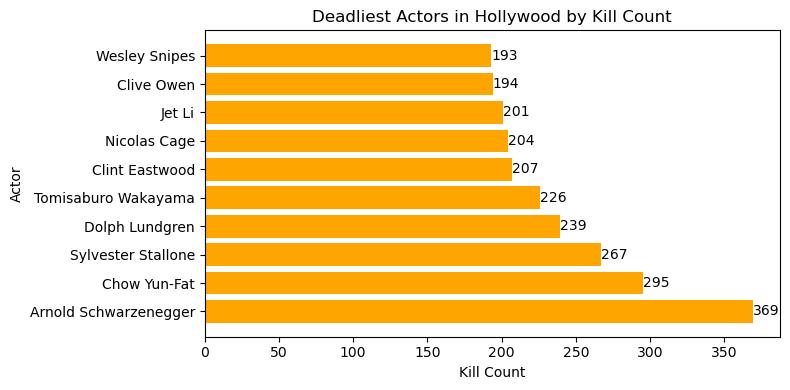

In [64]:
# Sort the actors by their kill count in descending order

sorted_data = actor.sort_values('Count', ascending=False)
sorted_data

# Create a horizontal bar chart

plt.figure(figsize=(8, 4))

plt.barh(sorted_data['Actor'], sorted_data['Count'], color='orange')

# Labeling axes and title

plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood by Kill Count')

# Display kill count labels on the bars
for i, value in enumerate(sorted_data['Count']):
    plt.text(value, i, str(value), ha='left', va='center')
    
# Display the plot
plt.tight_layout()
plt.show()


# Question-9

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
# Load dataset into a DataFrame
file_path = 'C:\\Georgian\BDAT-1004\\Problem Set\\3\\roman-emperor-reigns.csv'
emperor = pd.read_csv(file_path)

In [67]:
emperor

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


In [68]:
# Count the number of assassinated and non-assassinated emperors

assassinated_counts = emperor['Cause_of_Death'].value_counts()
assassinated_counts

Assassinated             22
Natural causes           16
Possibly assassinated     8
Killed in battle          8
Suicide                   5
Illness                   5
Executed                  3
Died in captivity         1
Name: Cause_of_Death, dtype: int64

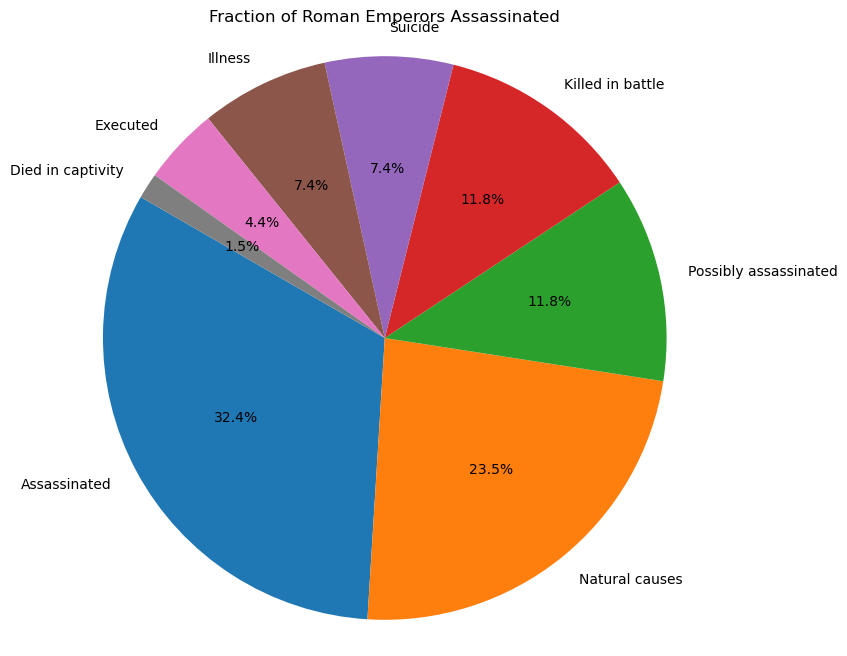

In [69]:
# Create a pie chart

plt.figure(figsize=(8, 8))
plt.pie(assassinated_counts, labels=assassinated_counts.index, autopct='%1.1f%%', startangle=150)
plt.axis('equal')
plt.title('Fraction of Roman Emperors Assassinated')

# Display the pie chart
plt.show()

# Question-10

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
# Load the dataset
file_path = 'C:\\Georgian\\BDAT-1004\\Problem Set\\3\\arcade-revenue-vs-cs-doctorates.csv' 
revenue= pd.read_csv(file_path)
revenue

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


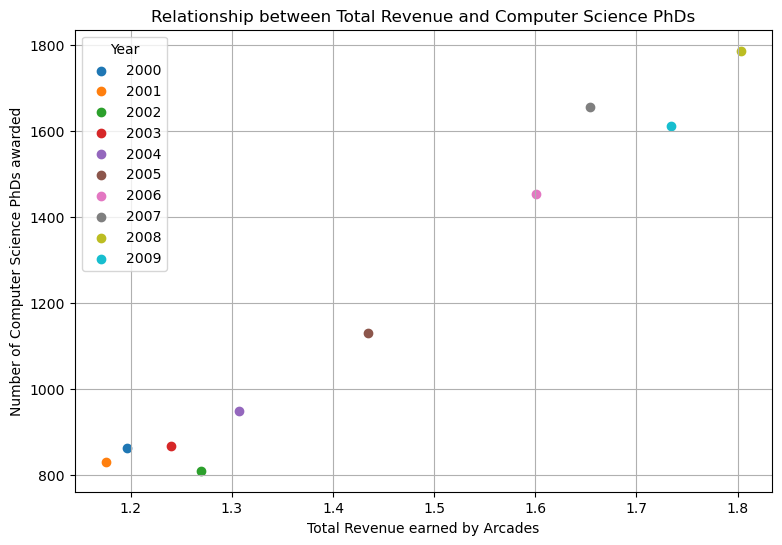

In [73]:
# Create a scatter plot

plt.figure(figsize=(9, 6))
for year in revenue['Year'].unique():
    year_data = revenue[revenue['Year'] == year]
    plt.scatter(year_data['Total Arcade Revenue (billions)'], year_data['Computer Science Doctorates Awarded (US)'], label=year)

# Label the axes

plt.xlabel('Total Revenue earned by Arcades')
plt.ylabel('Number of Computer Science PhDs awarded')
plt.title('Relationship between Total Revenue and Computer Science PhDs')

# Showing  legend to  indicate the year for each color
plt.legend(title='Year')

# Show the scatter plot
plt.grid(True)